### Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

import re
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Loading and Pre-processing data

In [3]:
#loading the dataset
df_tweets = pd.read_csv("fifa_world_cup_2022_tweets.csv")

#Displaying first 5 rows of dataset
df_tweets.head(5)

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [4]:
#All columns present in the dataset
print(df_tweets.columns)

Index(['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet',
       'Tweet', 'Sentiment'],
      dtype='object')


In [5]:
#for this notebook, we are only using the tweet itself to do sentiment analysis.
#hence dropping all other columns except Tweets and Sentiment
df_tweets.drop(['Unnamed: 0','Date Created','Number of Likes','Source of Tweet'],axis=1,inplace=True)

#confirming changes
df_tweets.head(5)

,Tweet,Sentiment
0,What are we drinking today @TucanTribe \n@MadB...,neutral
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,Worth reading while watching #WorldCup2022 htt...,positive
3,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,"If the BBC cares so much about human rights, h...",negative


In [6]:
# Create a dictionary to map Sentiment to a numerical value.
class_map = {
    "negative": 0,
    "neutral" : 1,
    "positive": 2
}

#New clumn class for the mapped data
df_tweets['class'] = df_tweets.Sentiment.map(class_map)

#Dropping sentiment Column
df_tweets.drop(columns = ['Sentiment'], inplace = True)

#confirming changes
df_tweets.head(5)

,Tweet,class
0,What are we drinking today @TucanTribe \n@MadB...,1
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,2
2,Worth reading while watching #WorldCup2022 htt...,2
3,Golden Maknae shinning bright\n\nhttps://t.co/...,2
4,"If the BBC cares so much about human rights, h...",0


In [7]:
# List of Contractions to be removed
contractions = {
    "a'ight":"alright",
    "ain't":"are not",
    "amn't":"am not",
    "aren't":"are not",
    "can't":"cannot",
    "'cause": "because",
    "could've":"could have",
    "couldn't":"could not",
    "couldn't've":"could not have",
    "daren't":"dare not",
    "daresn't":"dare not",
    "dasn't":"dare not",
    "didn't":"did not",
    "doesn't":"does not",
    "don't":"do not",
    "everybody's":"everybody is",
    "everyone's":"everyone is",
    "giv'n":"given",
    "gonna":"going to",
    "gon't":"go not", 
    "gotta":"got to",
    "hadn't":"had not",
    "had've":"had have",
    "hasn't":"has not",
    "haven't":"have not",
    "he'd":"he had", 
    "he'll":"he will",
    "he's":"he is",
    "here's":"here is",
    "how'd":"how did",
    "how'll":"how will",
    "how're":"how are",
    "how's":"how is",
    "I'd":"I had",
    "I'd've":"I would have",
    "I'd'nt":"I would not",
    "I'd'nt've":"I would not have",
    "I'll":"I will",
    "I'm":"I am",
    "I've":"I have",
    "isn't":"is not",
    "it'd":"it would",
    "it'll":"it will",
    "it's":"it is",
    "let's":"let us",
    "ma'am":"madam",
    "mayn't":"may not",
    "may've":"may have",
    "mightn't":"might not",
    "might've":"might have",
    "mustn't":"must not",
    "mustn't've":"must not have",
    "must've":"must have",
    "needn't":"need not",
    "needn't've":"need not have",
    "o'clock":"of the clock",
    "oughtn't":"ought not",
    "oughtn't've":"ought not have",
    "shan't":"shall not",
    "she'd":"she would",
    "she'll":"she will",
    "she's":"she is",
    "should've":"should have",
    "shouldn't":"should not",
    "shouldn't've":"should not have",
    "somebody's":"somebody is",
    "someone's":"someone is",
    "something's":"something is",
    "so're":"so are",
    "so’s":"so is",
    "so’ve":"so have",
    "that'll":"that will",
    "that're":"that are",
    "that's":"that is",
    "that'd":"that would",
    "there'd":"there would",
    "there'll":"there will",
    "there're":"there are",
    "there's":"there is",
    "these're":"these are",
    "these've":"these have",
    "they'd":"they would",
    "they'll":"they will",
    "they're":"they are",
    "they've":"they have",
    "this's":"this is",
    "those're":"those are",
    "those've":"those have",
    "to've":"to have",
    "wasn't":"was not",
    "we'd":"we would",
    "we'd've":"we would have",
    "we'll":"we will",
    "we're":"we are",
    "we've":"we have",
    "weren't":"were not",
    "what'd":"what did",
    "what'll":"what will",
    "what're":"what are",
    "what's":"what is",
    "what've":"what have",
    "when's":"when is",
    "where'd":"where did",
    "where'll":"where will",
    "where're":"where are",
    "where's":"where is",
    "where've":"where have",
    "which'd":"which would",
    "which'll":"which will",
    "which're":"which are",
    "which's":"which is",
    "which've":"which have",
    "who'd":"who would",
    "who'd've":"who would have",
    "who'll":"who will",
    "who're":"who are",
    "who's":"who is",
    "who've":"who have",
    "why'd":"why did",
    "why're":"why are",
    "why's":"why is",
    "won't":"will not",
    "would've":"would have",
    "wouldn't":"would not",
    "wouldn't've":"would not have",
    "y'at":"you at",
    "yes’m":"yes madam",
    "you'd":"you would",
    "you'll":"you will",
    "you're":"you are",
    "you've":"you have"
}

In [8]:
# List of abbreviations to be replaced
abbreviations = {
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [9]:
def expand_contractions(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [10]:
def expand_abbreviations(sentence):
    final_words=[]
    words=sentence.split()
    final_words= [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return " ".join(final_words)

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def clean_text(sentence):
    sentence = sentence.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    sentence = pattern.sub('', sentence)
    sentence = " ".join(filter(lambda x:x[0]!='@', sentence.split()))
    emo = re.compile("["
                           u"\U0001F600-\U0001FFFF"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF" 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE
                    )
    sentence = emo.sub(r'', sentence)
    sentence = sentence.lower()
    sentence = expand_contractions(sentence)
    sentence = expand_abbreviations(sentence)
    sentence = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", sentence)
    tokens = word_tokenize(sentence)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words("english"))
    words = [w for w in words if not w in stop_words]
    return " ".join(words)

#applying clean_text function to all tweets from dataset
df_tweets['cleaned_tweets'] = df_tweets['Tweet'].apply(lambda x: clean_text(x))

## Web scrapping

In [13]:
#pip install snscrape
#pip install Tweepy

In [16]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
tweet_data = []
words="FIFA"
number =  5 #int(input("No. of tweets you want to extract: "))
for i, tweets in enumerate(sntwitter.TwitterHashtagScraper(f'#{words} lang:en').get_items()):
    if i > number:
        break
    tweet_data.append([tweets.content, tweets.username, tweets.date])
df = pd.DataFrame(tweet_data, columns=['Tweets', 'Username', 'Date'])
#print(df)
filename = 'scraped_tweets_snscrape.csv'
df.to_csv(filename, index = False)

ModuleNotFoundError: No module named 'snscrape'

In [ ]:
# def scrape(words, date_since, numtweet):
#         db = pd.DataFrame(columns=['username',
#                                    'description',
#                                    'location',
#                                    'following',
#                                    'followers',
#                                    'totaltweets',
#                                    'retweetcount',
#                                    'text',
#                                    'hashtags'])
#         tweets = tweepy.Cursor(api.search_tweets,
#                                words, lang="en",
#                                since_id=date_since,
#                                tweet_mode='extended').items(numtweet)
#         list_tweets = [tweet for tweet in tweets]
#         i = 1
#         for tweet in list_tweets:
#                 username = tweet.user.screen_name
#                 description = tweet.user.description
#                 location = tweet.user.location
#                 following = tweet.user.friends_count
#                 followers = tweet.user.followers_count
#                 totaltweets = tweet.user.statuses_count
#                 retweetcount = tweet.retweet_count
#                 hashtags = tweet.entities['hashtags']
#                 try:
#                         text = tweet.retweeted_status.full_text
#                 except AttributeError:
#                         text = tweet.full_text
#                 hashtext = list()
#                 for j in range(0, len(hashtags)):
#                         hashtext.append(hashtags[j]['text'])
#                 ith_tweet = [username, description,
#                              location, following,
#                              followers, totaltweets,
#                              retweetcount, text, hashtext]
#                 db.loc[len(db)] = ith_tweet
#                 i = i+1
#         filename = 'scraped_tweets_tweepy.csv'
#         db.to_csv(filename)

In [ ]:
# import tweepy
# consumer_key = 
# consumer_secret = 
# access_key = 
# access_secret = 
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_key, access_secret)
# api = tweepy.API(auth)
# print("Enter Twitter HashTag to search for")
# words = input()
# print("Enter Date since The Tweets are required in yyyy-mm--dd")
# date_since = input()
# numtweet = 50
# scrape(words, date_since, numtweet)
# print('Scraping has completed!')

## Applying Naive Bayes Algorithm

In [ ]:
from sklearn.model_selection import train_test_split # to split the dataset into 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+') # tokenizer for CountVectorizer
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize) 

X = df_tweets['cleaned_tweets'] #  X variable
Y = df_tweets['class'] # class/target variable
train_text, test_text, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42) # splitting the data

X_train = cv.fit_transform(train_text.values.astype('U'))
X_test = cv.transform(test_text.values.astype('U'))

In [ ]:
# importing the model from sci-kit learn
from sklearn.naive_bayes import MultinomialNB 

#from math import *
nb = MultinomialNB()
nb.fit(X_train, Y_train)               
print ("Train accuracy = {:.2f}%".format(nb.score(X_train,Y_train)*100))
print ("Test accuracy = {:.2f}%".format(nb.score(X_test,Y_test)*100))
train_acc_nb=nb.score(X_train,Y_train)
test_acc_nb=nb.score(X_test,Y_test)

#from sklearn.model_selection import cross_val_score
#cross_nb = cross_val_score(nb, X, Y,n_jobs = -1)
#print("Cross Validation score = ",cross_nb) 

Train accuracy = 79.50%
Test accuracy = 67.26%


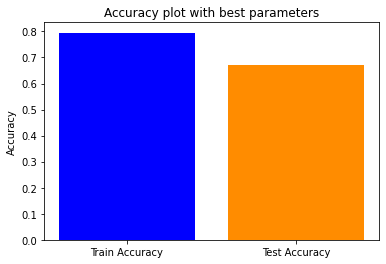

In [ ]:
#importing matplotlib to plot bar graph

import matplotlib.pyplot as plt

data_nb = [train_acc_nb,test_acc_nb]
labels = ['Train Accuracy','Test Accuracy']

plt.xticks([0,1], labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar([0,1], data_nb, color=['blue','darkorange']) 
plt.show()

## Live data testing

In [ ]:
# loading live data from saved file
live_data = pd.read_csv('/kaggle/working/scraped_tweets_snscrape.csv')
live_data.head(10)

,Tweets,Username,Date
0,❤️❤️ Numbers Lovers! ❤️❤️\n\n🙌 10000 NFTs Mint...,Metro_NFTs,2023-01-09 11:17:09+00:00
1,S&amp;P closes higher after Fed minutes confir...,CommoneyW,2023-01-09 11:09:31+00:00
2,$6.4M table game jackpot hits at Las Vegas Str...,WLysaght,2023-01-09 11:04:00+00:00
3,Nice Goal #football #Islamabad #Islamabad #FIF...,Just123Sports,2023-01-09 11:03:06+00:00
4,Bettor cashes parlay for more than $500K with ...,WLysaght,2023-01-09 11:01:01+00:00
5,📢 MatchDay\n\n🏆 | @LNDEsport1 eSerie D\n🆚 | @e...,reghiumesports,2023-01-09 11:00:32+00:00


In [ ]:
live_data.drop(columns = ['Username', 'Date'])
# i = 0
# for tweet in live_data.Tweets:
#     print("Tweet", i, ":")
#     print(tweet)
#     i += 1
#     print()

,Tweets
0,❤️❤️ Numbers Lovers! ❤️❤️\n\n🙌 10000 NFTs Mint...
1,S&amp;P closes higher after Fed minutes confir...
2,$6.4M table game jackpot hits at Las Vegas Str...
3,Nice Goal #football #Islamabad #Islamabad #FIF...
4,Bettor cashes parlay for more than $500K with ...
5,📢 MatchDay\n\n🏆 | @LNDEsport1 eSerie D\n🆚 | @e...


In [ ]:
#cleaning the live data
live_data['cleaned_tweets'] = live_data.Tweets.apply(lambda x: clean_text(x))

In [ ]:
# i = 0
# for tweet in live_data.cleaned_tweets:
#     print("Tweet", i, ":")
#     print(tweet)
#     i += 1
#     print()

In [ ]:
# Modelling the live data
live_input = cv.transform(live_data['cleaned_tweets'].values.astype('U'))
live_predictions = nb.predict(live_input)

In [ ]:
#Printing predictions
for i in range(len(live_predictions)):
    print("Original Tweet")
    print(live_data.Tweets[i], end = '\n\n')
    print('Cleaned Tweet')
    print(live_data.cleaned_tweets[i], end = '\n\n')
    if(live_predictions[i] == 0):
        print("Prediction: Negative")
    elif(live_predictions[i] == 1):
        print("Prediction: Neutral")
    else:
        print("Prediction: Positive")

Original Tweet
❤️❤️ Numbers Lovers! ❤️❤️

🙌 10000 NFTs Minted
#metaverse
💰Sale is live ⤵️

https://t.co/VNmShkKOGe

#Numbers #QatarWorldCup2022
#WorldCup #FreeMint
#FreeNFTs #NFTs
#shiba
#FIFA #Solana #Numbers
#MATIC #Polygon https://t.co/J7qTMlUBCl

Cleaned Tweet
numbers lovers nfts minted metaverse sale live numbers worldcup freemint freenfts nfts shiba fifa solana numbers matic polygon

Prediction: Neutral
Original Tweet
S&amp;P closes higher after Fed minutes confirm inflation focus https://t.co/k74AuoLce8 #sports #football #baseball #basketball #sports #news #news #breaking #news #fifa #soccer

Cleaned Tweet
sampp closes higher fed minutes confirm inflation focus sports football baseball basketball sports news news breaking news fifa soccer

Prediction: Negative
Original Tweet
$6.4M table game jackpot hits at Las Vegas Strip casino https://t.co/5BCQIblQ7C 
#LasVegas
#SportsBetting
#Raiders
#VegasGoldenKnights
#WorldCup
#FIFA
#FORMULAR1

Cleaned Tweet
table game jackpot hits las ve